# 1. Understanding the problem

For this example, the problem has been defined for us.  Quoting from the Chapter 2 in the book:

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

“Welcome to the Machine Learning Housing Corporation! Your first task is to use California census data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). I will call them “districts” for short.
Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.”

*Excerpt From: Aurélien Géron. “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition.” Apple Books.*

</div>

After this initial problem statement, you'll want to identify your key stakeholder(s) (here, your boss) and understand the context of this problem more deeply.  One critical question to consider (from [Heilmeir's catcheism](https://www.darpa.mil/work-with-us/heilmeier-catechism), which we'll talk about more) is:

> **How is it done today, and what are the limits of current practice?**

One sub-question to consider here (again, we'll talk about this more later) is, do we really need ML?  Would a simpler and less resource intensive process make more sense?  This is an important one to keep in the back of your head. Again, we'll come back to this.

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

“The first question to ask your boss is what exactly the business objective is. Building a model is probably not the end goal. How does the company expect to use and benefit from this model? Knowing the objective is important because it will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it.
Your boss answers that your model’s output (a prediction of a district’s median housing price) will be fed to another Machine Learning system (see Figure 2-2), along with many other signals.⁠2 This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.

The next question to ask your boss is what the current solution looks like (if any). The current situation will often give you a reference for performance, as well as insights on how to solve the problem. Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.
This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 30%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price, given other data about that district. The census data looks like a great dataset to exploit for this purpose, since it includes the median housing prices of thousands of districts, as well as other data.”

*Excerpt From: Aurélien Géron. “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition.” Apple Books.*
</div>

In actuality, this process is likely to take a lot longer.  Discovering the the *right* problem to tackle will make or break the project for you!




# 2. Get the Data

This is fairly straightforward here, but in reality, hunting for good data will test your ability to google!  Don't forget that as a student, there are often librarians standing by whose primary area of expertise is *finding data*.  Use this resource.

Be sophisticated and thoughtful about the data you get.  Is it from a credible source?  Was it collected in an ethical manner? Does it contain personal / private information that should not be revealed?  These considerations are beyond the scope of this course, but their importance cannot be emphasized enough.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("data/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="data")
    return pd.read_csv(Path("data/housing/housing.csv"))

housing = load_housing_data()

# 3. Explore the data and understand it (EDA)

A first step is to just glance at the data table.  Do you understand what the columns mean?  Do you understand what the entries in categorical columns are? Units in continuous columns? Hunt for metadata if you don't have it, and look for others who might have worked with the data previously to gain further insight.

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Examine distributions using histograms or other techniques.

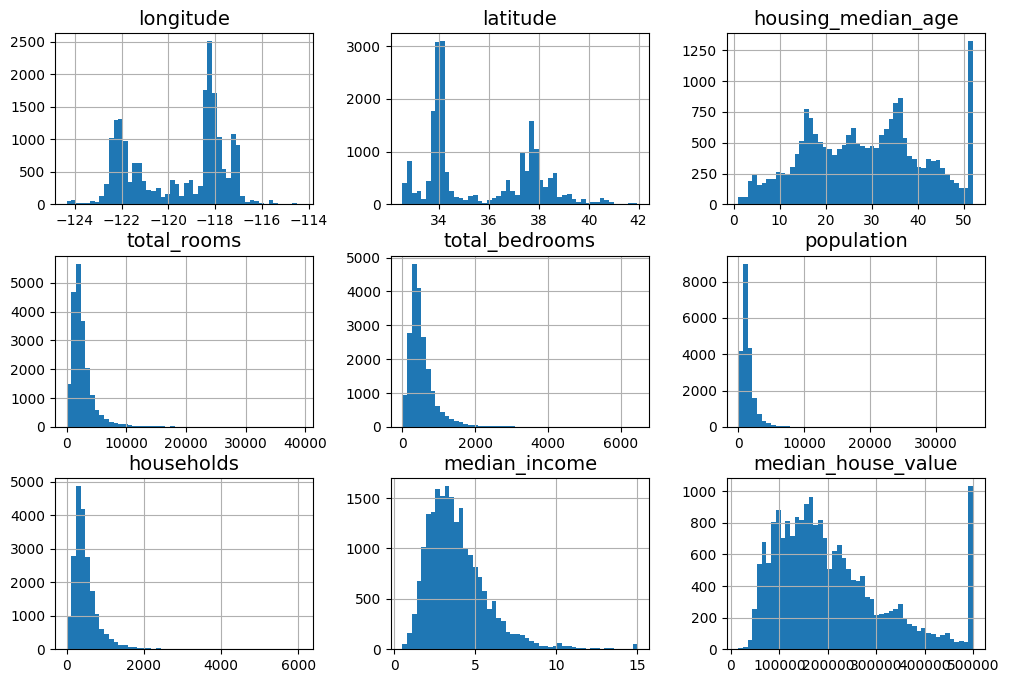

In [6]:
import matplotlib.pyplot as plt


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

Analyzing distributions is a critical step in the initial stages of ML, because we often like to even out and / or shift the distributions of variables to make it easier for the model to learn. This is referred to as "scaling" our data.  We'll talk more about this later.

## Visualizing Geographical Data

With geographical, looking at the data spatially is particularly important.  The following is a good start, but really isn't great because of the problem of "overplotting" - which occurs when you have many datapoints in the same spot.

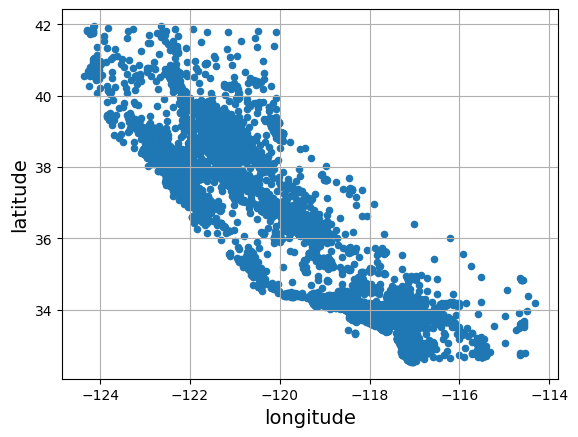

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

The following is a bit better.

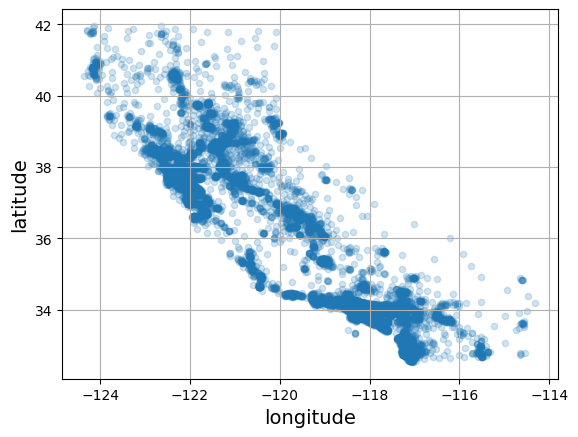

In [8]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

Even better...

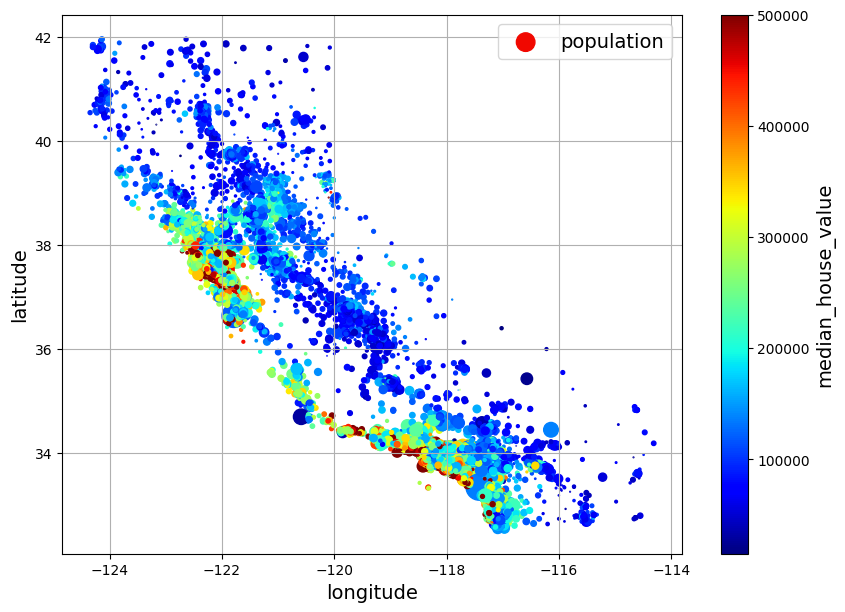

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

The next cell generates the first figure in the chapter (this code is not in the book). It's just a beautified version of the previous figure, with an image of California added in the background, nicer label names and no grid.

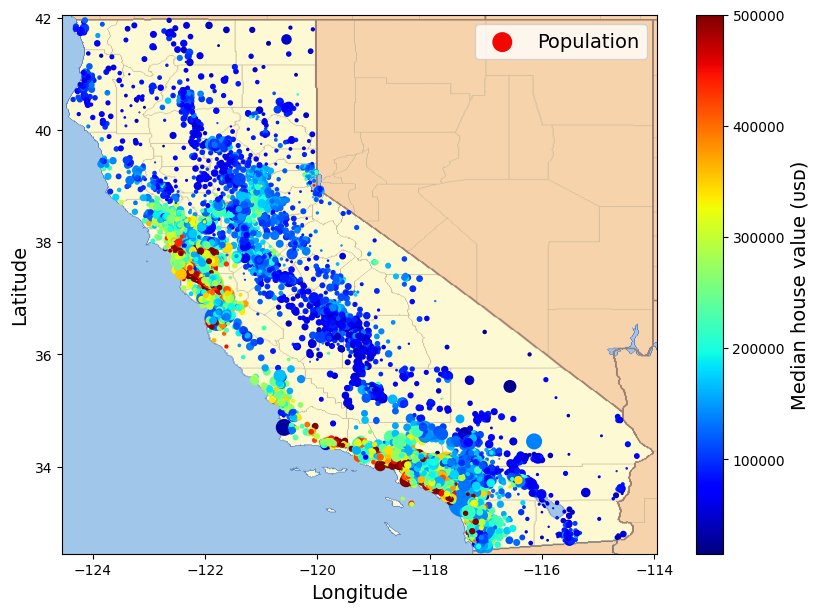

In [10]:
import pathlib

# Download the California image
filename = "california.png"
IMAGES_PATH = Path() / "assets"
if not (IMAGES_PATH /filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

## Looking for Correlations

Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [11]:
corr_matrix = housing.corr(numeric_only=True)

In [12]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

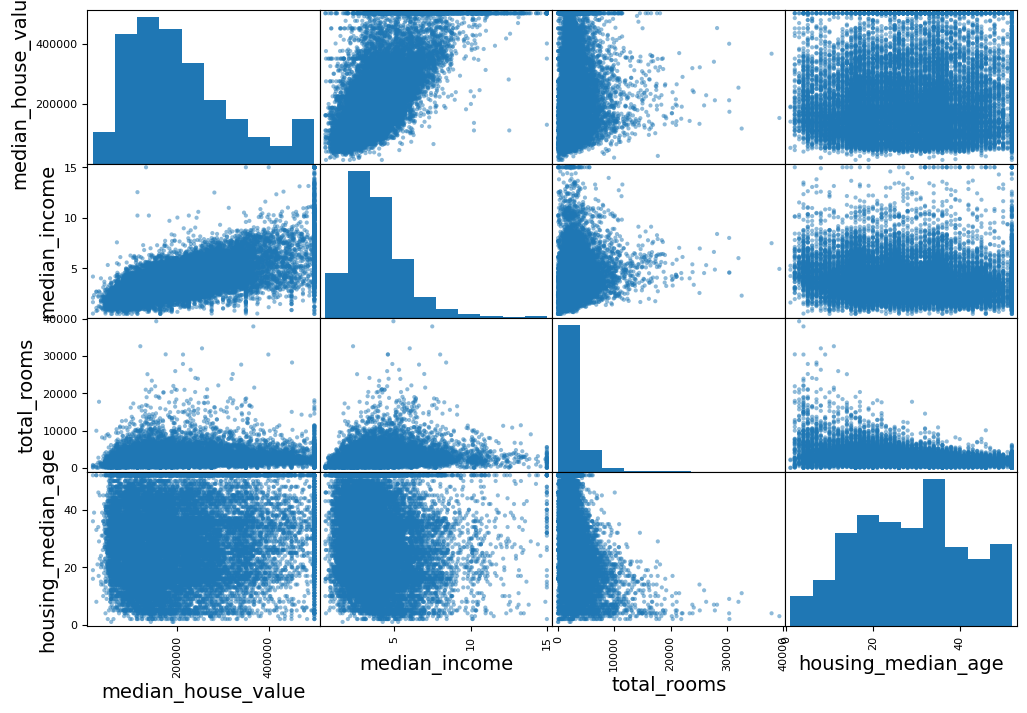

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

## Experimenting with Attribute Combinations

Even before we begin in on the task of modeling, different combinations of attributes might suggest themselves to you.  Although this is a type of feature engineering, doing this during the EDA phase can help deepen your understanding of the data.

In [14]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [15]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64